Using `ggplot2` (Grammar of Graphics)
----

In addition to the `base` plotting facilites we have been using, R also has the `ggplot2` package that can be used to generate beutfiul graphs. We will only touch on a small subset of `ggplot2` capabiliites here.

**References**

- [R Graphics Cookbook](http://www.cookbook-r.com/Graphs/)

In [1]:
options(warn=-1)

In [2]:
# from https://gist.github.com/stevenworthington/3178163
ipak <- function(pkg){
    new.pkg <- pkg[!(pkg %in% installed.packages()[, "Package"])]
    if (length(new.pkg)) 
        install.packages(new.pkg, dependencies = TRUE, repos = "http://cran.r-project.org")
    sapply(pkg, require, character.only = TRUE)
}
 
# usage
packages <- c("ggplot2",  "gplots", "lattice", "plyr", "reshape2",
              "RColorBrewer", "grid", "gridExtra", "igraph", "igraphdata")
suppressMessages(ipak(packages))

ggplot2       gplots      lattice         plyr     reshape2 RColorBrewer 
        TRUE         TRUE         TRUE         TRUE         TRUE         TRUE 
        grid    gridExtra       igraph   igraphdata 
        TRUE         TRUE         TRUE         TRUE

In [4]:
library(ggplot2)
library(grid)
library(gridExtra)

### Data set

We will use about characteristics of different cars.

In [5]:
?mtcars

mtcars                package:datasets                 R Documentation

_M_o_t_o_r _T_r_e_n_d _C_a_r _R_o_a_d _T_e_s_t_s

_D_e_s_c_r_i_p_t_i_o_n:

     The data was extracted from the 1974 _Motor Trend_ US magazine,
     and comprises fuel consumption and 10 aspects of automobile design
     and performance for 32 automobiles (1973-74 models).

_U_s_a_g_e:

     mtcars
     
_F_o_r_m_a_t:

     A data frame with 32 observations on 11 variables.

       [, 1]  mpg   Miles/(US) gallon                        
       [, 2]  cyl   Number of cylinders                      
       [, 3]  disp  Displacement (cu.in.)                    
       [, 4]  hp    Gross horsepower                         
       [, 5]  drat  Rear axle ratio                          
       [, 6]  wt    Weight (lb/1000)                         
       [, 7]  qsec  1/4 mile time                            
       [, 8]  vs    V/S                                      
       [, 9]  am    Transmission (0 = automatic, 1 = manual) 
       [,10]  gear  Number of forward gears                  
       [,11]  carb  Number of carburetors                    
      
_S_o_u_r_c_e:

     Henderson and Velleman (1981), Building multiple regression models
     interactively.  _Biometrics_, *37*, 391-411.

_E_x_a_m_p_l_e_s:

     require(graphics)
     pairs(mtcars, main = "mtcars data")
     coplot(mpg ~ disp | as.factor(cyl), data = mtcars,
            panel = panel.smooth, rows = 1)

In [6]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21,6,160,110,3.9,2.62,16.46,0,1,4,4
Mazda RX4 Wag,21,6,160,110,3.9,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.32,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.44,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.46,20.22,1,0,3,1


Chaining plotting functions
----

- ggplot()
- aes()
- geom_xxx()
- annotationa

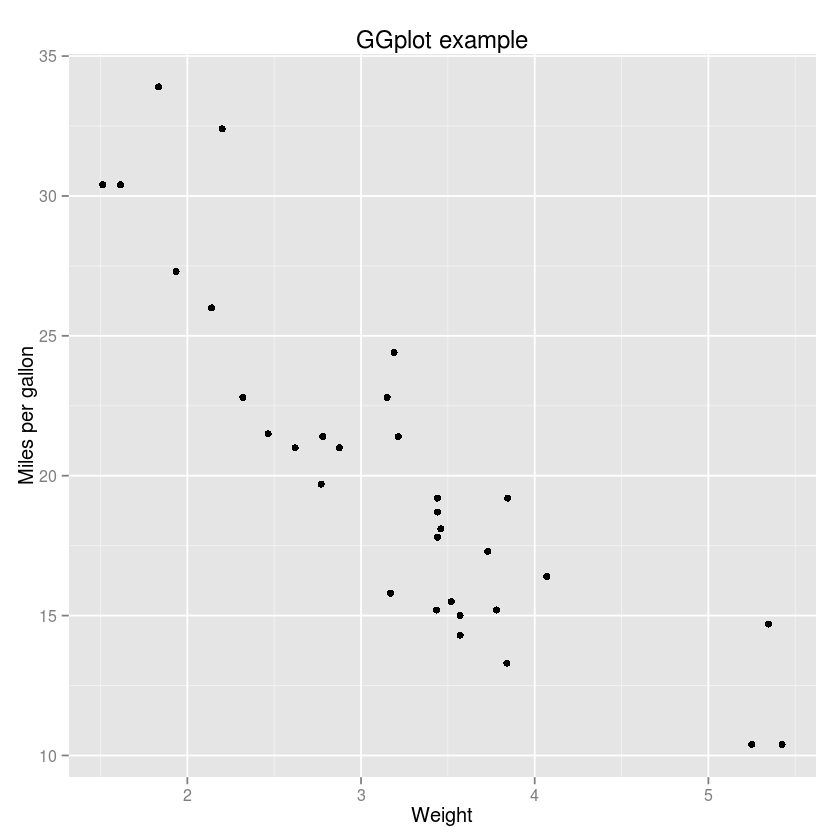

In [7]:
ggplot(data=mtcars, aes(x=wt, y=mpg)) +
geom_point() +
labs(title="GGplot example", x="Weight", y="Miles per gallon")

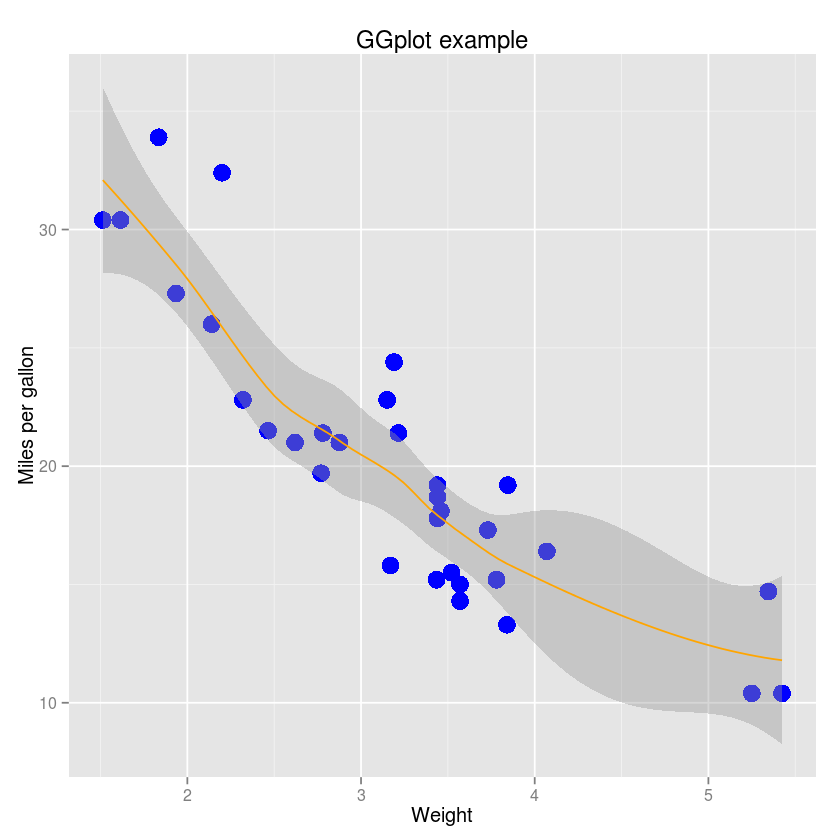

In [8]:
ggplot(data=mtcars, aes(x=wt, y=mpg)) +
geom_point(color="blue", size=5) +
geom_smooth(method="loess", color="orange") +
labs(title="GGplot example", x="Weight", y="Miles per gallon")

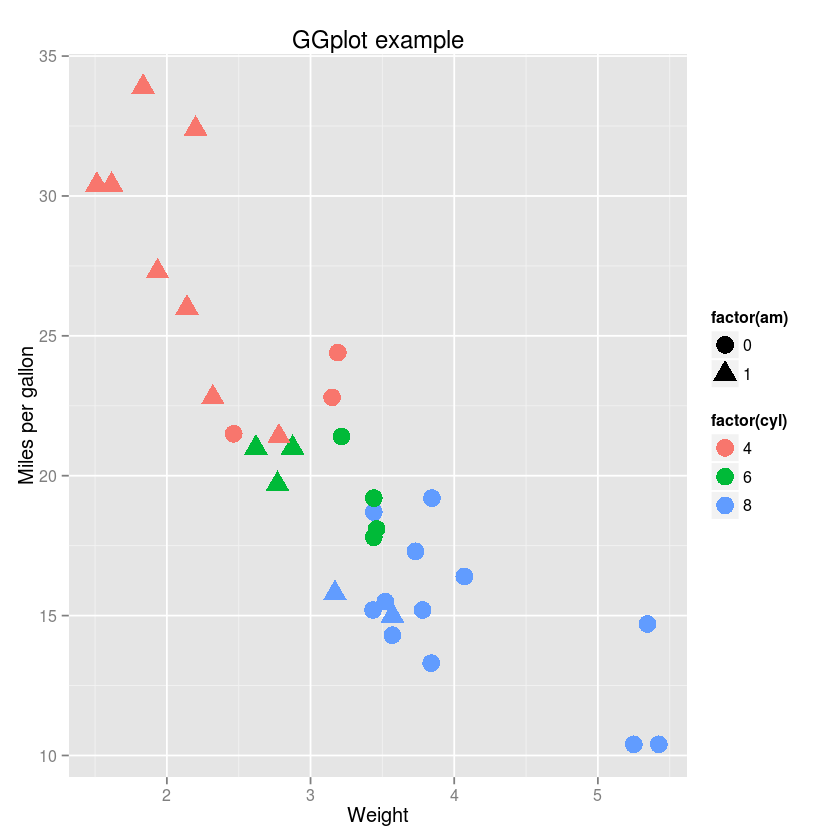

In [9]:
ggplot(data=mtcars, aes(x=wt, y=mpg, color=factor(cyl),, shape=factor(am))) +
geom_point(size=5) +
labs(title="GGplot example", x="Weight", y="Miles per gallon")

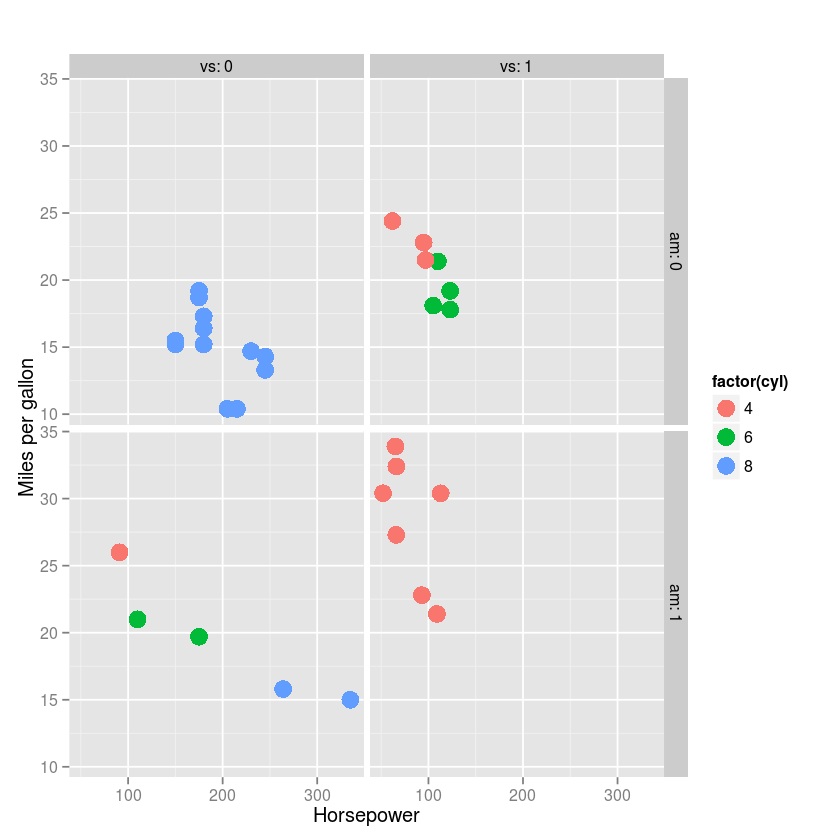

In [10]:
ggplot(data=mtcars, aes(x=hp, y=mpg, color=factor(cyl))) +
geom_point(size=5) +
facet_grid(am ~ vs, labeller = label_both) +
labs(title="", x="Horsepower", y="Miles per gallon")

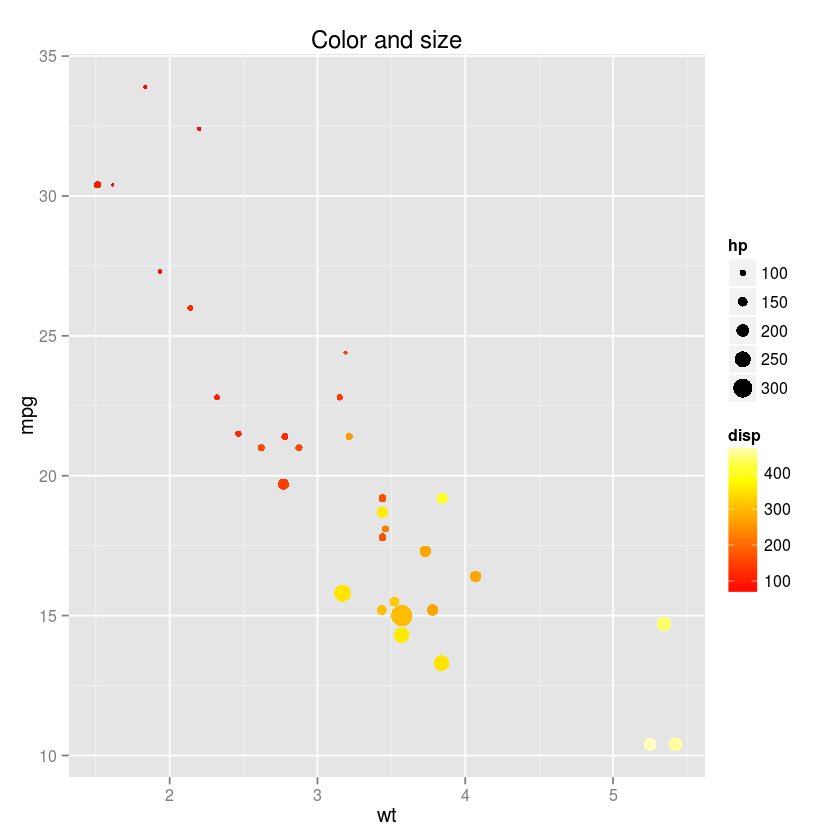

In [51]:
p <- ggplot(mtcars, aes(x=wt, y=mpg))
p + 
geom_point(aes(size=hp, color=disp)) + 
ggtitle("Color and size") + 
scale_colour_gradientn(colours=heat.colors(10))

### Basic plots

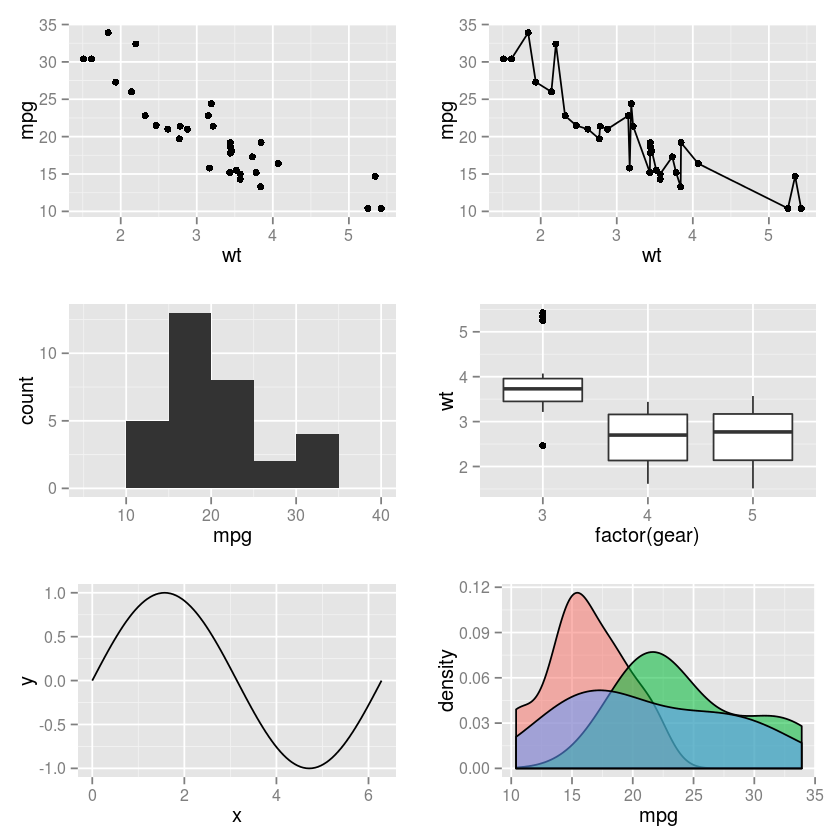

In [23]:
p1 <- ggplot(mtcars, aes(x=wt, y=mpg)) + geom_point()
p2 <- ggplot(mtcars, aes(x=wt, y=mpg)) + geom_point() + geom_line()
p3 <- ggplot(mtcars, aes(x=mpg)) + geom_histogram(binwidth=5)
p4 <- ggplot(mtcars, aes(x=factor(gear), y=wt)) + geom_boxplot()
p5 <- ggplot(data.frame(x=seq(0, 2*pi, length.out = 50)), aes(x=x)) + stat_function(fun=sin, geom="line")
p6 <- ggplot(mtcars, aes(x=mpg, alpha=0.5, fill=factor(gear))) + geom_density() +
    guides(alpha=FALSE, fill=FALSE)
grid.arrange(p1, p2, p3, p4, p5, p6, ncol = 2)

### Plot aesthetics

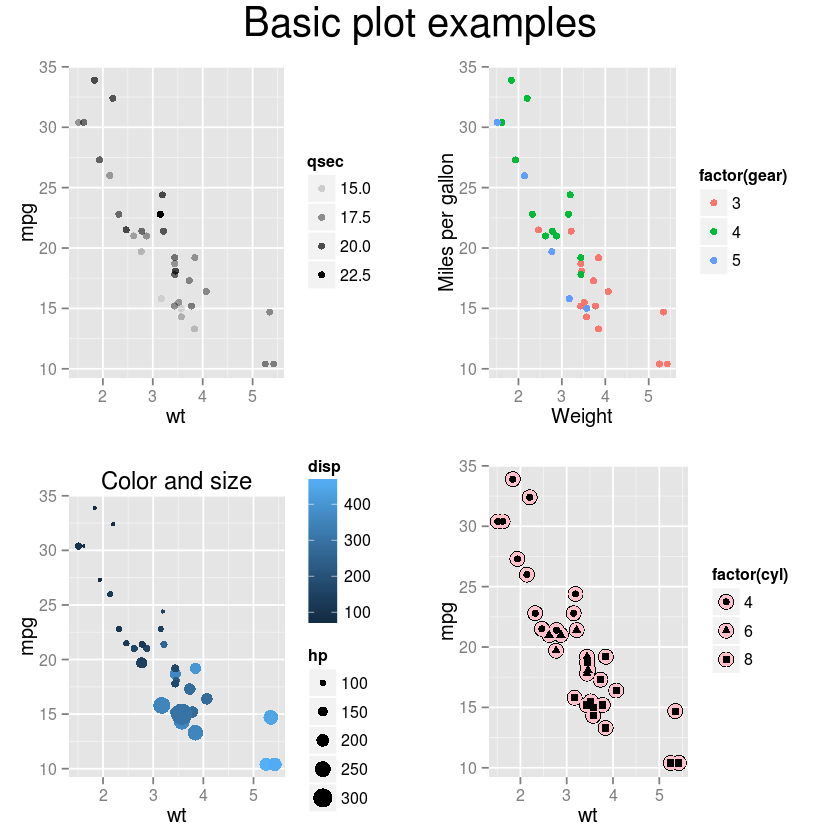

In [31]:
p <- ggplot(mtcars, aes(x=wt, y=mpg))
p1 <- p + geom_point(aes(alpha=qsec))
p2 <- p + geom_point(aes(color=factor(gear))) + xlab("Weight") + ylab("Miles per gallon")
p3 <- p + geom_point(aes(size=hp, color=disp)) + ggtitle("Color and size")
p4 <- p + geom_point(colour="black", size = 4.5, show_guide = TRUE) + 
          geom_point(colour="pink", size = 4, show_guide = TRUE) +
          geom_point(aes(shape = factor(cyl)))
grid.arrange(p1, p2, p3, p4, ncol = 2, top=textGrob("Basic plot examples", gp=gpar(cex=2)))

### Adding fitted lines

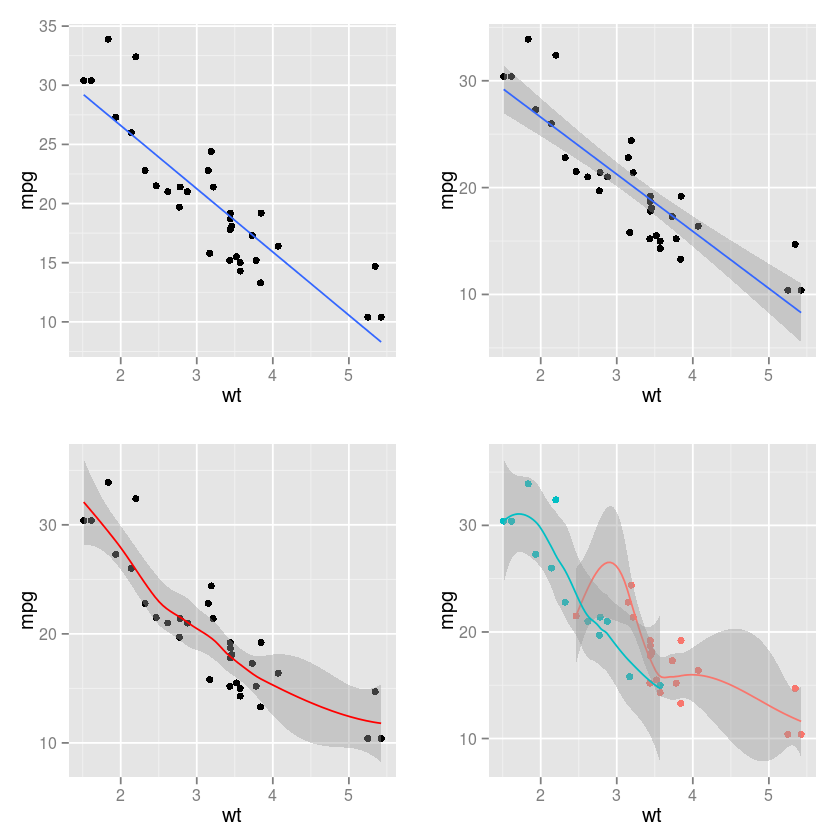

In [20]:
p <- ggplot(mtcars, aes(x=wt, y=mpg))
p1 <- p + geom_point() + stat_smooth(method=lm, se=FALSE)
p2 <- p + geom_point() + stat_smooth(method=lm, level=0.95)
p3 <- p + geom_point() + stat_smooth(method=loess, color='red')
p4 <- ggplot(mtcars, aes(x=wt, y=mpg, color=factor(am))) + geom_point() + 
    geom_smooth(method='loess') + guides(color=FALSE)
grid.arrange(p1, p2, p3, p4, ncol = 2)

#### Using existing model fits

In [14]:
m1 <- lm(mpg ~ wt, data=mtcars)
pred1 <- data.frame(wt=seq(min(mtcars$wt), max(mtcars$wt), length.out=100))
pred <- predict(m1, pred1, se.fit=TRUE)
pred1$mpg <- pred$fit
pred1$low <- pred1$mpg - 1.96*pred$se.fit
pred1$high <- pred1$mpg + 1.96*pred$se.fit

In [15]:
m2 <- loess(mpg ~ wt, data=mtcars)
pred2 <- data.frame(wt=seq(min(mtcars$wt), max(mtcars$wt), length.out=100))
pred2$mpg <- predict(m2, pred2)

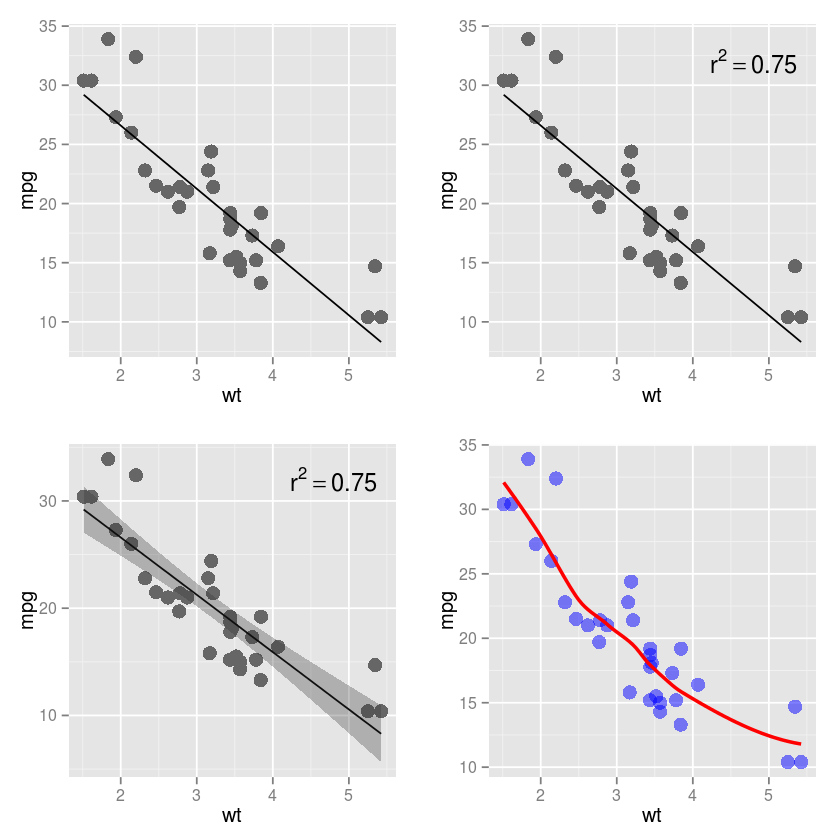

In [22]:
p <- ggplot(mtcars, aes(x=wt, y=mpg))
p1 <- p + geom_point(size=4, color='gray40') + geom_line(data=pred1)
p2 <- p + geom_point(size=4, color='gray40') + geom_line(data=pred1) +
    annotate("text", label="r^2 == 0.75", parse=TRUE, x=4.8, y=32)
p3 <- p + geom_point(size=4, color='gray40') + geom_line(data=pred1) +
    geom_ribbon(data=pred1,aes(ymin=low,ymax=high),alpha=0.3) +
    annotate("text", label="r^2 == 0.75", parse=TRUE, x=4.8, y=32)
p4 <- p + geom_point(size=4, color='blue', alpha=0.5) + geom_line(data=pred2, color='red', size=1)
grid.arrange(p1, p2, p3, p4, ncol = 2)